In [1]:
import numpy
import torchvision

train = torchvision.datasets.FashionMNIST('fmnist', train = True, download = False)
test = torchvision.datasets.FashionMNIST('fmnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "2/train")
train_features = extractor.transform(train_images, "2/train")
test_features = extractor.transform(test_images, "2/test")

Calculating inverted images
Got the result from ./2/train/greyscale/features.npy
Got the result from ./2/train/greyscale/features.npy
Got the result from ./2/train/inverted_greyscale/features.npy
Got the result from ./2/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_0_-1/featu

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "2/train")
train_diagrams = extractor.transform(train_images, "2/train")
test_diagrams = extractor.transform(test_images, "2/test")

Calculating inverted images
Got the result from ./2/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./2/train/greyscale/diagrams.npy
Got the result from ./2/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./2/train/inverted_greyscale/diagrams.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./2/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 4/72: 2/HeightFiltrartion_-1

Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./2/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.7268, 'TOP-2 Accuracy': 0.8794, 'TOP-3 Accuracy': 0.9454, 'TOP-4 Accuracy': 0.971, 'TOP-5 Accuracy': 0.9855, 'TOP-6 Accuracy': 0.9929, 'TOP-7 Accuracy': 0.9952, 'TOP-8 Accuracy': 0.9972, 'TOP-9 Accuracy': 0.9987, 'AUC-ROC': 0.9637353833333331, 'Precision': 0.7342319468359635, 'Recall': 0.7268000000000001, 'F1-score': 0.7274996397019768}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./2/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.8749, 'TOP-2 Accuracy': 0.9616, 'TOP-3 Accuracy': 0.9845, 'TOP-4 Accuracy': 0.9921, 'TOP-5 Accuracy': 0.9966, 'TOP-6 Accuracy': 0.9985, 'TOP-7 Accuracy': 0.9991, 'TOP-8 Accuracy': 0.9994, 'TOP-9 Accuracy': 0.9996, 'AUC-ROC': 0.9889824722222224, 'Precision': 0.873626996480

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,Метод k ближайших соседей,0.7268,0.8794,0.9454,0.9710,0.9855,0.9929,0.9952,0.9972,0.9987,0.963735,0.734232,0.7268,0.727500
1,Случайный лес,0.8749,0.9616,0.9845,0.9921,0.9966,0.9985,0.9991,0.9994,0.9996,0.988982,0.873627,0.8749,0.873701
2,Град. бустинг на основе гистограм,0.8589,0.9539,0.9842,0.9923,0.9968,0.9988,0.9996,0.9999,0.9999,0.986313,0.856997,0.8589,0.857173
3,CatBoost,0.8924,0.9725,0.9911,0.9959,0.9983,0.9995,0.9998,0.9999,1.0000,0.991902,0.892116,0.8924,0.892113
4,XGBoost,0.8758,0.9636,0.9874,0.9946,0.9973,0.9992,0.9998,0.9999,1.0000,0.989712,0.875319,0.8758,0.875374
5,Нейронная сеть для тополог. признаков,0.8747,0.9569,0.9796,0.9885,0.9938,0.9961,0.9973,0.9984,0.9993,0.982636,0.874817,0.8747,0.874521
6,Обучаемая векторизация диаграмм,0.6639,0.8158,0.8938,0.9368,0.9636,0.9813,0.9901,0.9958,0.9983,0.924800,0.667125,0.6639,0.658155
7,ResNet18 – базовая модель,0.8874,0.9279,0.9545,0.9717,0.9819,0.9875,0.9937,0.9953,0.9959,0.972204,0.888893,0.8874,0.886511
8,Комбинированная нейронная сеть,0.8932,0.9395,0.9635,0.9832,0.9876,0.9906,0.9929,0.9951,0.9957,0.978204,0.894643,0.8932,0.890677


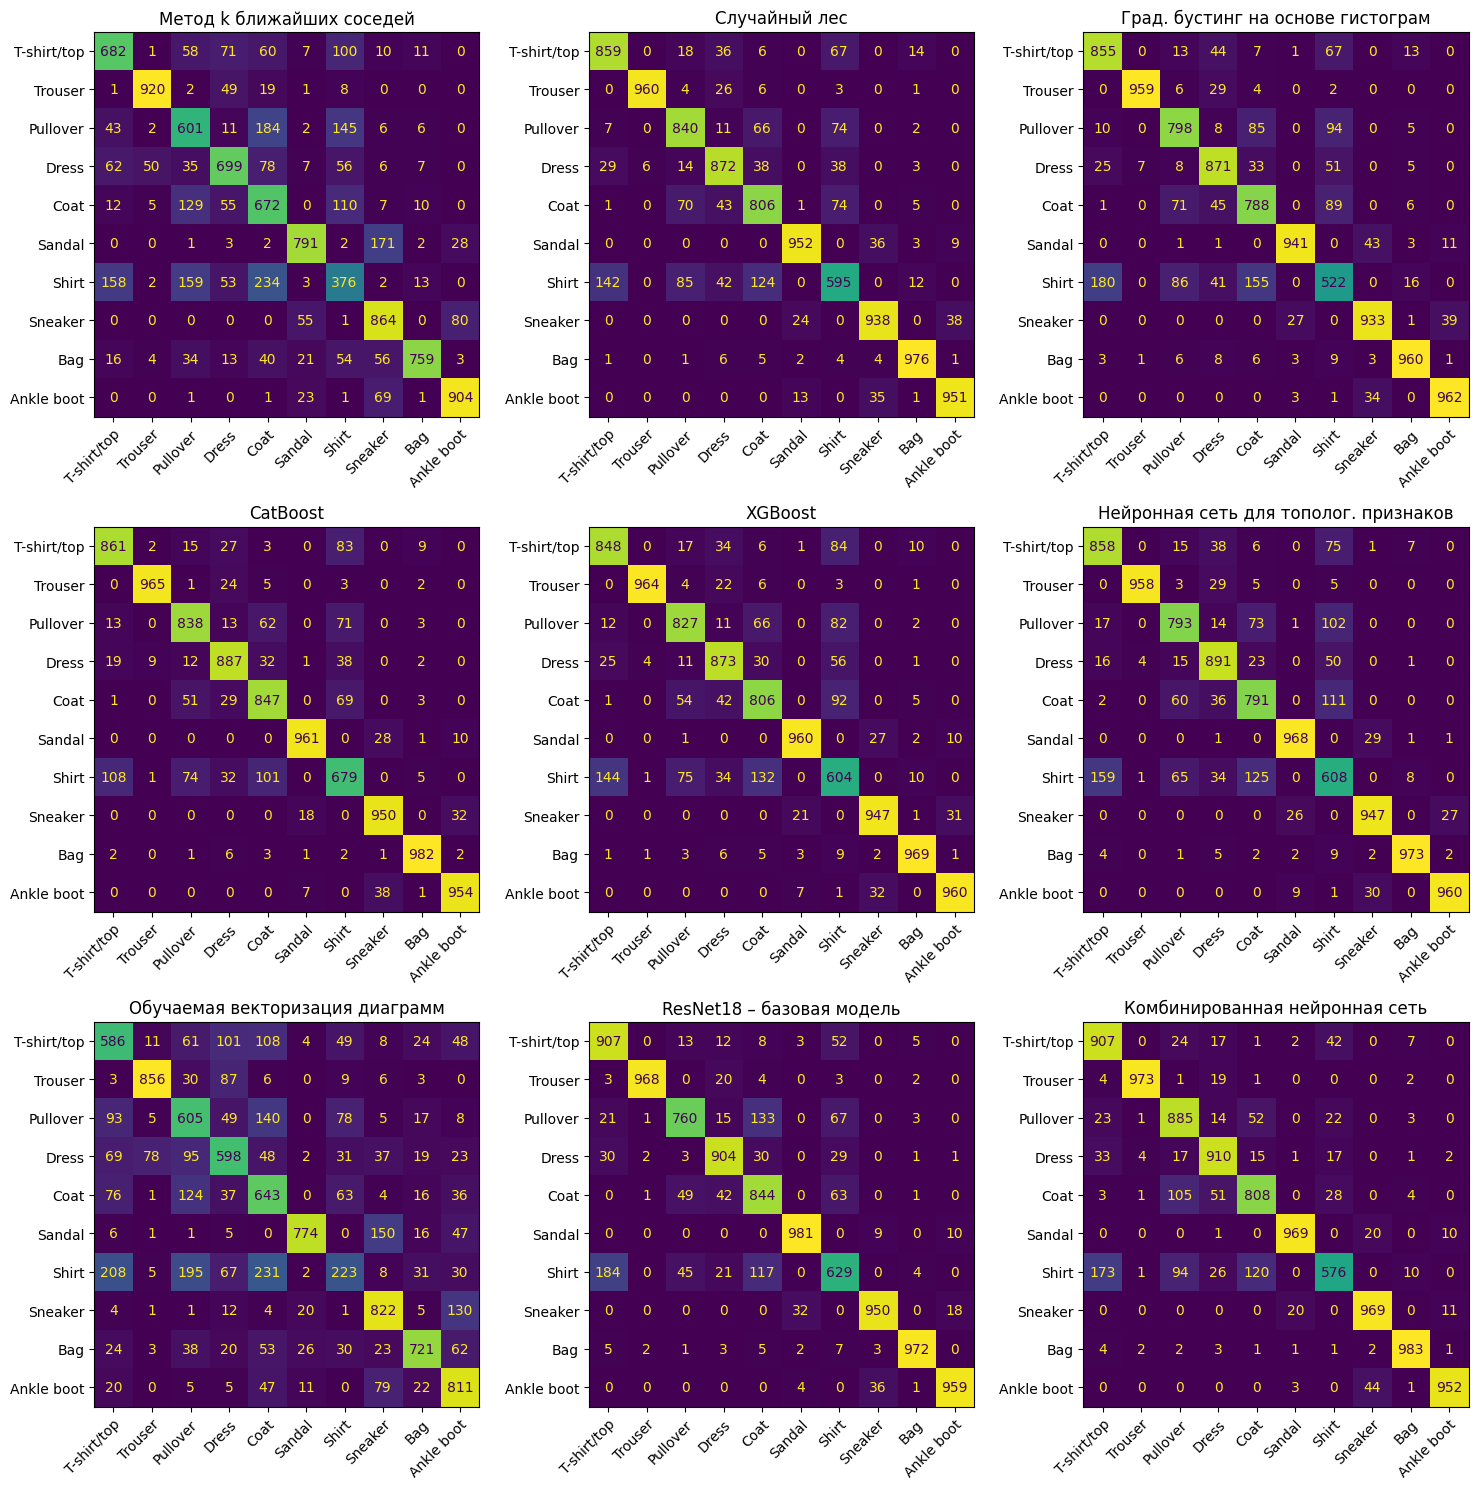

In [ ]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    label_names = train.classes, dump_name = "2/predictions",
    only_get_from_dump = True
)

In [1]:
import numpy
import torchvision

test = torchvision.datasets.FashionMNIST('fmnist', train = False, download = False)

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [5]:
test.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(10000,)

In [15]:
predictions = numpy.argmax(numpy.load("2/predictions/NNClassifier_features_images.npy"), axis = 1)
part1 = numpy.where((predictions != test_labels) & numpy.isin(predictions, [ 0, 2, 4, 6 ]) & numpy.isin(test_labels, [ 0, 2, 4, 6 ]))[0]
print(part1)
len(part1)

[   4   17   40   66   98  103  117  166  217  239  241  243  244  247
  248  282  286  322  324  325  344  361  381  382  387  389  394  396
  407  413  444  454  455  474  476  510  511  541  548  565  572  587
  595  634  637  639  664  665  670  689  716  724  732  760  761  793
  801  805  815  851  860  881  905  909  921  933  938  956  963  965
  966  971  977  994  997 1000 1025 1055 1056 1058 1077 1107 1129 1130
 1131 1139 1152 1162 1165 1174 1194 1197 1210 1223 1231 1235 1241 1294
 1297 1305 1329 1352 1369 1374 1387 1396 1399 1408 1449 1458 1469 1481
 1487 1496 1509 1527 1528 1533 1545 1572 1596 1620 1642 1643 1650 1671
 1686 1712 1728 1739 1743 1744 1745 1756 1771 1856 1922 1943 2001 2006
 2009 2042 2067 2069 2089 2138 2144 2162 2190 2191 2195 2252 2293 2298
 2302 2311 2319 2320 2326 2337 2352 2373 2397 2421 2425 2431 2462 2464
 2469 2485 2487 2491 2506 2509 2540 2551 2571 2580 2588 2603 2617 2628
 2661 2670 2671 2681 2713 2717 2734 2746 2752 2757 2776 2828 2839 2840
 2843 

687

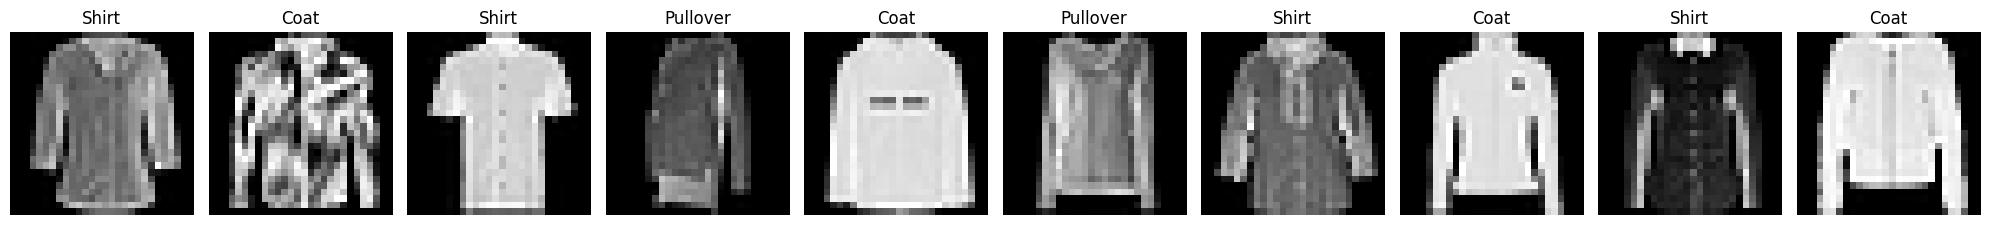

In [21]:

import matplotlib.pyplot as plt
figure, axes = plt.subplots(1, 10, figsize = (20, 4))

for i in range(10):
    axes[i].imshow(test_images[part1[i]], cmap = "gray")
    axes[i].set_title(test.classes[test_labels[part1[i]]])
    axes[i].axis(False)

figure.tight_layout()

plt.savefig("2/predictions/error_examples.svg")
plt.savefig("2/predictions/error_examples.png")